In [5]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [6]:
data=pd.read_csv(r'C:\Users\cleme\Desktop\IronHack\Project_7\data_clean.csv')
data


,Bankrupt?,Operating_Gross_Margin,Operating_Profit_Rate,After-tax_net_Interest_Rate,Non-industry_income_and_expenditure/revenue,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest-bearing_debt_interest_rate,Tax_rate_(A),...,Liability-Assets_Flag,Net_Income_to_Total_Assets,Total_assets_to_GNP_price,No-credit_Interval,Net_Income_to_Stockholder's_Equity,Liability_to_Equity,Degree_of_Financial_Leverage_(DFL),Interest_Coverage_Ratio_(Interest_expense_to_EBIT),Net_Income_Flag,Equity_to_Liability
0,1,0.601457,0.998969,0.808809,0.302646,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,...,0,0.716845,0.009219,0.622879,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.610235,0.998946,0.809301,0.303556,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,...,0,0.795297,0.008323,0.623652,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.601450,0.998857,0.808388,0.302035,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,...,0,0.774670,0.040003,0.623841,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.583541,0.998700,0.808966,0.303350,1.078888e-04,0.000000e+00,0.465705,4.490449e-04,0.000000,...,0,0.739555,0.003252,0.622929,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.598783,0.998973,0.809304,0.303475,7.890000e+09,0.000000e+00,0.462746,6.860686e-04,0.000000,...,0,0.795016,0.003878,0.623521,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.604455,0.998992,0.809331,0.303510,1.510213e-04,4.500000e+09,0.463734,1.790179e-04,0.113372,...,0,0.799927,0.000466,0.623620,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.598308,0.998992,0.809327,0.303520,5.220000e+09,1.440000e+09,0.461978,2.370237e-04,0.371596,...,0,0.799748,0.001959,0.623931,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.610444,0.998984,0.809317,0.303512,2.509312e-04,1.039086e-04,0.472189,0.000000e+00,0.490839,...,0,0.797778,0.002840,0.624156,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.607850,0.999074,0.809399,0.303498,1.236154e-04,2.510000e+09,0.476123,2.110211e-04,0.181294,...,0,0.811808,0.002837,0.623957,0.841084,0.277547,0.026822,0.565302,1,0.044009


# --------------Features Selection-------------------------------------

In [7]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [8]:
X = data.drop(['Bankrupt?'], axis = 1)
y = data['Bankrupt?']

In [9]:
rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = 39, step = 1)
m=rfe_selector.fit(X, y)
X.columns[m.get_support()]
print("Num Features: %s" % (m.n_features_))
print("Selected Features: %s" % (m.support_))
print("Feature Ranking: %s" % (m.ranking_))

Num Features: 39
Selected Features: [False False  True  True  True False False  True False  True False False
  True False False False  True False  True  True False False  True  True
  True  True  True False False  True False False  True  True  True  True
 False  True  True  True  True False False  True  True  True False False
  True False False  True False  True  True False False False  True False
 False False False False False False False False  True  True  True  True
  True  True  True False  True]
Feature Ranking: [ 2 13  1  1  1 12  9  1 37  1 28  6  1 32 14 26  1 16  1  1 15  3  1  1
  1  1  1 27 35  1 11 24  1  1  1  1 10  1  1  1  1 31 33  1  1  1  5 30
  1 34 19  1 36  1  1 17  8 18  1 22 25 21 20  7 29  4 23 38  1  1  1  1
  1  1  1 39  1]


In [11]:
X.loc[:, m.support_].columns

Index(['After-tax_net_Interest_Rate',
       'Non-industry_income_and_expenditure/revenue', 'Operating_Expense_Rate',
       'Interest-bearing_debt_interest_rate', 'Net_Value_Per_Share_(A)',
       'Operating_Profit_Per_Share_(Yuan_¥)',
       'Continuous_Net_Profit_Growth_Rate', 'Net_Value_Growth_Rate',
       'Total_Asset_Return_Growth_Rate_Ratio', 'Quick_Ratio',
       'Interest_Expense_Ratio', 'Total_debt/Total_net_worth', 'Debt_ratio_%',
       'Net_worth/Assets', 'Net_profit_before_tax/Paid-in_capital',
       'Accounts_Receivable_Turnover', 'Average_Collection_Days',
       'Inventory_Turnover_Rate_(times)', 'Fixed_Assets_Turnover_Frequency',
       'Revenue_per_person', 'Operating_profit_per_person',
       'Allocation_rate_per_person', 'Working_Capital_to_Total_Assets',
       'Cash/Total_Assets', 'Quick_Assets/Current_Liability',
       'Cash/Current_Liability', 'Inventory/Working_Capital',
       'Working_Capital/Equity', 'Retained_Earnings_to_Total_Assets',
       'Total_in

In [12]:
X=X.loc[:, m.support_]

In [13]:
#--------------Splitting between train set and test set----------------------------

In [14]:
X

,After-tax_net_Interest_Rate,Non-industry_income_and_expenditure/revenue,Operating_Expense_Rate,Interest-bearing_debt_interest_rate,Net_Value_Per_Share_(A),Operating_Profit_Per_Share_(Yuan_¥),Continuous_Net_Profit_Growth_Rate,Net_Value_Growth_Rate,Total_Asset_Return_Growth_Rate_Ratio,Quick_Ratio,...,Total_income/Total_expense,Working_capitcal_Turnover_Rate,Net_Income_to_Total_Assets,Total_assets_to_GNP_price,No-credit_Interval,Net_Income_to_Stockholder's_Equity,Liability_to_Equity,Degree_of_Financial_Leverage_(DFL),Interest_Coverage_Ratio_(Interest_expense_to_EBIT),Equity_to_Liability
0,0.808809,0.302646,1.256969e-04,7.250725e-04,0.147950,0.095921,0.217535,0.000327,0.263100,0.001208,...,0.002022,0.593831,0.716845,0.009219,0.622879,0.827890,0.290202,0.026601,0.564050,0.016469
1,0.809301,0.303556,2.897851e-04,6.470647e-04,0.182251,0.093722,0.217620,0.000443,0.264516,0.004039,...,0.002226,0.593916,0.795297,0.008323,0.623652,0.839969,0.283846,0.264577,0.570175,0.020794
2,0.808388,0.302035,2.361297e-04,7.900790e-04,0.177911,0.092338,0.217601,0.000396,0.264184,0.005348,...,0.002060,0.594502,0.774670,0.040003,0.623841,0.836774,0.290189,0.026555,0.563706,0.016474
3,0.808966,0.303350,1.078888e-04,4.490449e-04,0.154187,0.077762,0.217568,0.000382,0.263371,0.002896,...,0.001831,0.593889,0.739555,0.003252,0.622929,0.834697,0.281721,0.026697,0.564663,0.023982
4,0.809304,0.303475,7.890000e+09,6.860686e-04,0.167502,0.096898,0.217626,0.000439,0.265218,0.003727,...,0.002224,0.593915,0.795016,0.003878,0.623521,0.839973,0.278514,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.809331,0.303510,1.510213e-04,1.790179e-04,0.175045,0.098200,0.217635,0.000450,0.264517,0.005457,...,0.002266,0.593985,0.799927,0.000466,0.623620,0.840359,0.279606,0.027064,0.566193,0.029890
6815,0.809327,0.303520,5.220000e+09,2.370237e-04,0.181324,0.098608,0.217631,0.000445,0.264730,0.006741,...,0.002288,0.593954,0.799748,0.001959,0.623931,0.840306,0.278132,0.027009,0.566018,0.038284
6816,0.809317,0.303512,2.509312e-04,0.000000e+00,0.269521,0.100073,0.217547,0.000435,0.263858,0.035112,...,0.002239,0.594025,0.797778,0.002840,0.624156,0.840138,0.275789,0.026791,0.565158,0.097649
6817,0.809399,0.303498,1.236154e-04,2.110211e-04,0.213392,0.111799,0.218006,0.000529,0.264409,0.007256,...,0.002395,0.593997,0.811808,0.002837,0.623957,0.841084,0.277547,0.026822,0.565302,0.044009


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4773, 39)
(4773,)
(2046, 39)
(2046,)


# --------------Gaussian Process Classifier----------------------------

In [16]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0).fit(x_train, y_train)

In [21]:
y_pred_gpc=gpc.predict(x_test)

In [22]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_gpc)

In [23]:
confusion_matrix

array([[1971,    9],
       [  62,    4]], dtype=int64)

In [24]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = metrics.confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


The classification report for Gaussian Process Classifier is:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.31      0.06      0.10        66

    accuracy                           0.97      2046
   macro avg       0.64      0.53      0.54      2046
weighted avg       0.95      0.97      0.95      2046



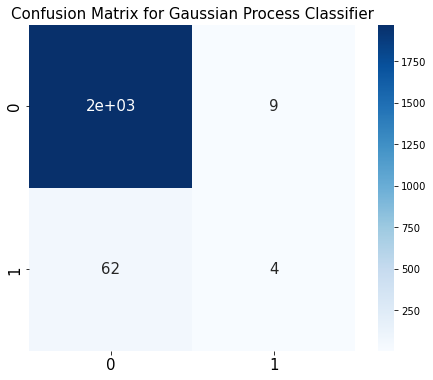

In [25]:
generate_results(gpc, y_pred_gpc, 'Gaussian Process Classifier')

In [26]:
#from sklearn.metrics import roc_auc_score
#print(metrics.roc_auc_score(x_test["y_initial"],x_test["y_pred"]))

In [27]:
from sklearn.metrics import roc_auc_score
print(metrics.roc_auc_score(y_test,y_pred_gpc))

0.528030303030303


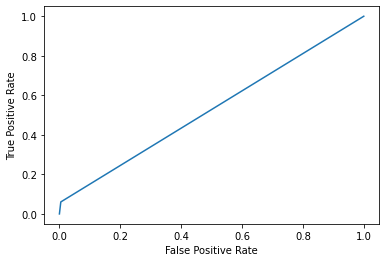

In [28]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_gpc)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

# --------------TPOT CLASSIFIER----------------------------

In [18]:
# check tpot version
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 0.11.7


C:\Users\cleme\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [19]:
from tpot import TPOTClassifier

In [20]:
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [21]:
pipeline_optimizer.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9698304191774507

Generation 2 - Current best internal CV score: 0.9712970463301392

Generation 3 - Current best internal CV score: 0.971716114019779

Generation 4 - Current best internal CV score: 0.971716114019779

Generation 5 - Current best internal CV score: 0.9721345231431174

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.9500000000000001, min_samples_leaf=7, min_samples_split=14, n_estimators=100)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

# --------------BaggingClassifier----------------------------

In [29]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#
bgclassifier = BaggingClassifier( n_estimators=20,
                                 max_features=27,
                                 max_samples=4000,
                                 random_state=1, n_jobs=-1)
#
# Fit the bagging classifier
#
bgclassifier.fit(x_train, y_train)
#
# Model scores on test and training data
#
print('Model test Score: %.3f, ' %bgclassifier.score(x_test, y_test),
      'Model training Score: %.3f' %bgclassifier.score(x_train, y_train))

Model test Score: 0.966,  Model training Score: 0.996


In [31]:
y_pred_bgg = bgclassifier.predict(x_test)

In [32]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_bgg)
confusion_matrix

array([[1966,   14],
       [  55,   11]], dtype=int64)


The classification report for BaggingClassifier is:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1980
           1       0.44      0.17      0.24        66

    accuracy                           0.97      2046
   macro avg       0.71      0.58      0.61      2046
weighted avg       0.96      0.97      0.96      2046



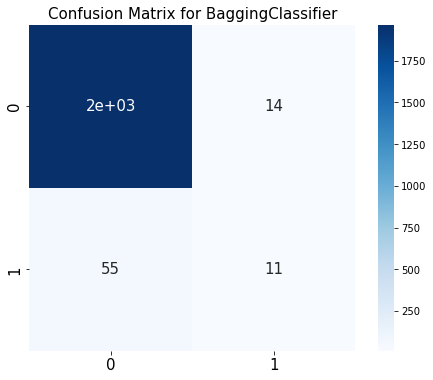

In [33]:
generate_results(bgclassifier, y_pred_bgg, 'BaggingClassifier')

In [34]:
print(metrics.roc_auc_score(y_test,y_pred_bgg))

0.5797979797979798


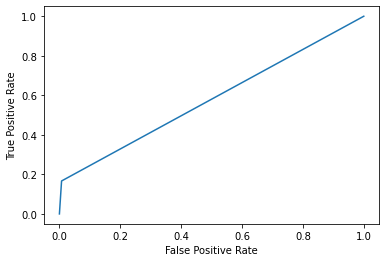

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_bgg)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

 # ------------------MultinomialNB------------------------

In [36]:
from sklearn.naive_bayes import MultinomialNB
MNBclf = MultinomialNB()
MNBclf.fit(x_train, y_train)

MultinomialNB()

In [37]:
y_pred__MNB = MNBclf.predict(x_test)


In [38]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred__MNB )
confusion_matrix

array([[1667,  313],
       [  41,   25]], dtype=int64)


The classification report for MultinomialNB is:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      1980
           1       0.07      0.38      0.12        66

    accuracy                           0.83      2046
   macro avg       0.52      0.61      0.51      2046
weighted avg       0.95      0.83      0.88      2046



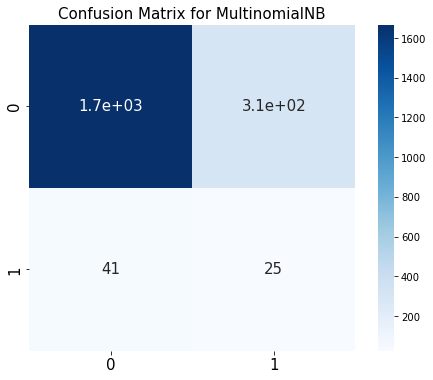

In [39]:
generate_results(MNBclf, y_pred__MNB, 'MultinomialNB')

In [40]:
print(metrics.roc_auc_score(y_test,y_pred__MNB))

0.6103535353535354


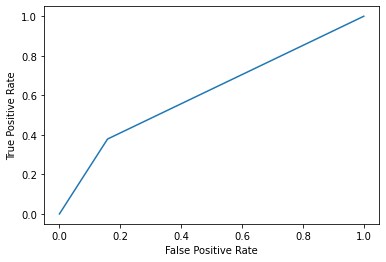

In [41]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred__MNB)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

# # ------------------QuadraticDiscriminantAnalysis------------------------

In [42]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train, y_train)

C:\Users\cleme\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [43]:
y_pred_clf=clf.predict(x_test)

In [56]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_clf)
confusion_matrix

array([[ 416, 1564],
       [   5,   61]], dtype=int64)


The classification report for Quadratic Discriminant Analysis is:
              precision    recall  f1-score   support

           0       0.99      0.21      0.35      1980
           1       0.04      0.92      0.07        66

    accuracy                           0.23      2046
   macro avg       0.51      0.57      0.21      2046
weighted avg       0.96      0.23      0.34      2046



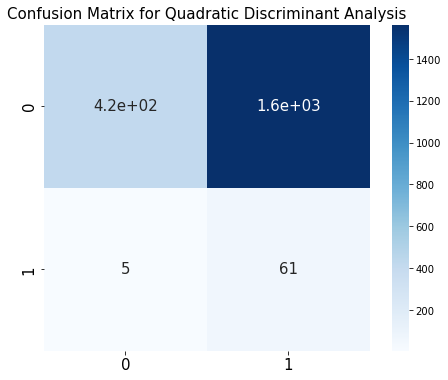

In [57]:
generate_results(clf, y_pred_clf, 'Quadratic Discriminant Analysis')

In [58]:
print(metrics.roc_auc_score(y_test,y_pred_clf))

0.5671717171717172


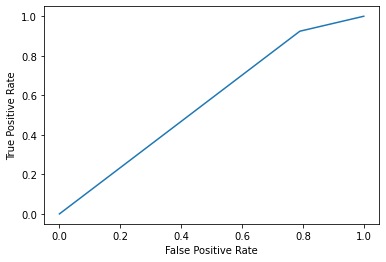

In [59]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_clf)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

# # ------------------Stacking------------------------

In [44]:
from sklearn.svm import NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [45]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('knn', KNeighborsClassifier(n_neighbors=1)),
     ('SVC', NuSVC(nu=0.0345, class_weight='balanced'))]
stack_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression())

In [46]:
stack_clf.fit(x_train, y_train).score(x_test, y_test)

0.9682306940371457

In [47]:
y_pred_stack=stack_clf.predict(x_test)

In [48]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_stack)
confusion_matrix

array([[1974,    6],
       [  59,    7]], dtype=int64)


The classification report for Stacking  is:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.54      0.11      0.18        66

    accuracy                           0.97      2046
   macro avg       0.75      0.55      0.58      2046
weighted avg       0.96      0.97      0.96      2046



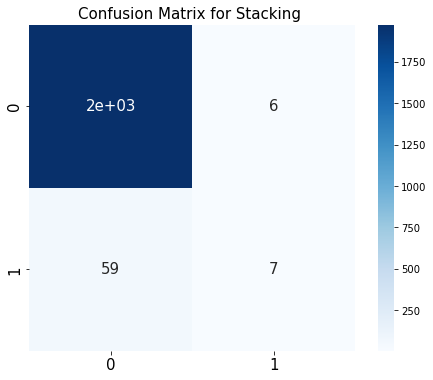

In [49]:
generate_results(stack_clf, y_pred_stack, 'Stacking ')

In [50]:
print(metrics.roc_auc_score(y_test,y_pred_stack))

0.5515151515151514


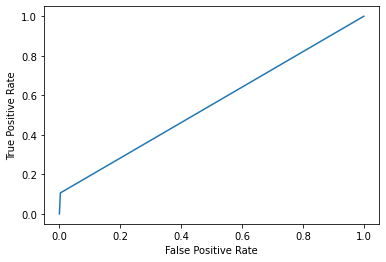

In [51]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_stack)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

# # ------------------RandomForestClassifier------------------------


In [52]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')

The accuracy of the Random Forest Classifier is: 97.21407624633432 %



The classification report for RandomForestClassifier is:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1980
           1       0.74      0.21      0.33        66

    accuracy                           0.97      2046
   macro avg       0.86      0.60      0.66      2046
weighted avg       0.97      0.97      0.96      2046



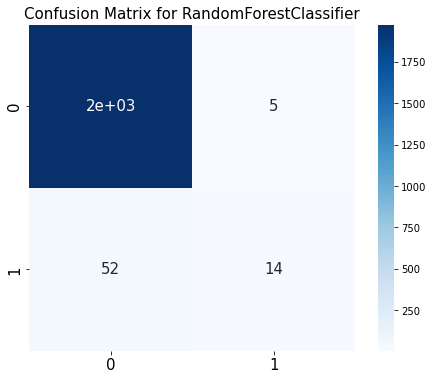

In [53]:
generate_results(rfc, y_pred_rfc, 'RandomForestClassifier')

In [54]:
print(metrics.roc_auc_score(y_test,y_pred_rfc))

0.6047979797979798


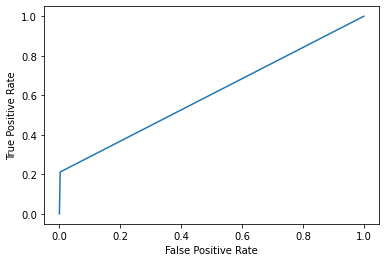

In [55]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_rfc)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()